First few rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Missing Values per Column:
RowNumber          0
CustomerId         0
Su

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


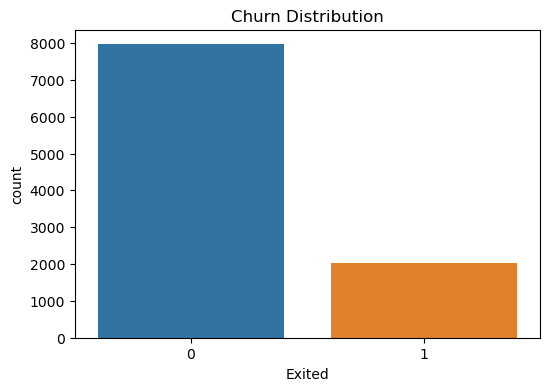

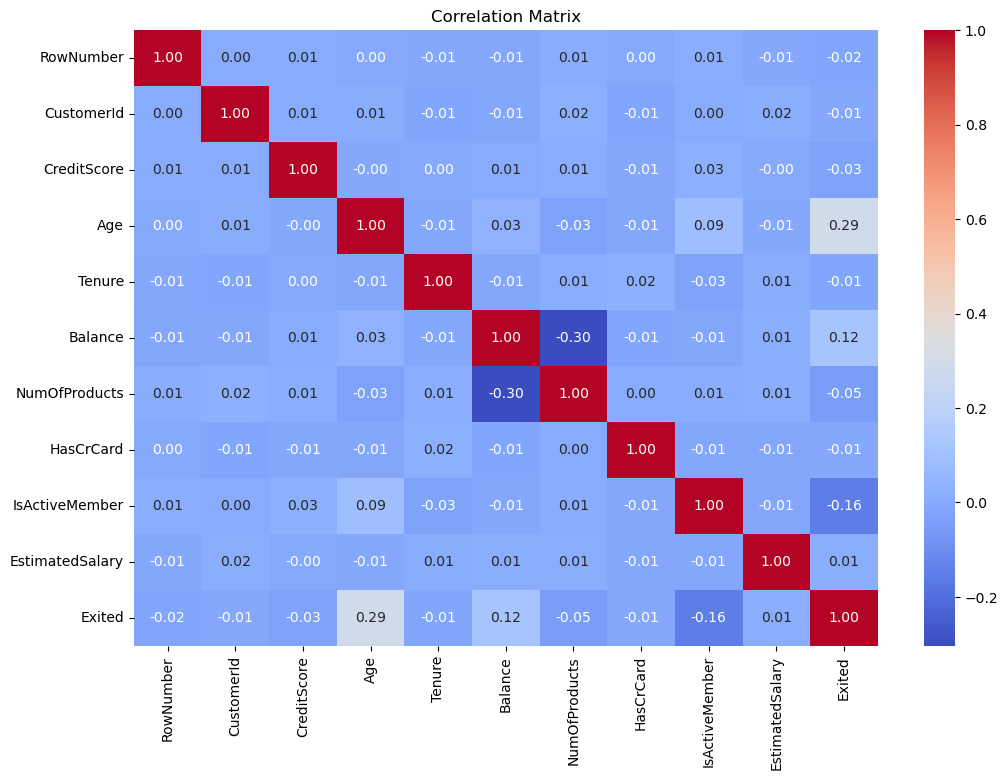

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Data
# Replace 'customer_churn.csv' with your file path
data = pd.read_csv(r'C:\Users\Sosa the chief\Downloads\Churn_Modelling.csv')

# Step 3: Initial Exploration
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Check basic information about the dataset
print("\nDataset Information:")
data.info()

# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# Statistical summary for numerical columns
print("\nStatistical Summary for Numerical Columns:")
display(data.describe())

# Step 4: Basic Visual Exploration
# Distribution of the target variable (e.g., 'Exited' for churned customers)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution')
plt.show()

# Step 5: Feature Distribution and Correlation
# Heatmap of correlations between numerical features
plt.figure(figsize=(12, 8))

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])  # Filters numeric columns
correlation_matrix = numeric_data.corr()  # Calculate correlation matrix

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [2]:
# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Verify the remaining columns
print("Remaining columns after dropping unimportant ones:")
print(data.columns)


Remaining columns after dropping unimportant ones:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Encode Categorical Variables
# Use LabelEncoder for 'Gender' (binary), and OneHotEncode 'Geography' (multi-category)
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# One-hot encode 'Geography' and drop the original column
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

# Step 2: Split the Data into Training and Test Sets
# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale Numerical Features (optional)
# Define numerical columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features in training and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Check the transformed training data
print("Training data preview after preprocessing:")
display(X_train.head())


Training data preview after preprocessing:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9254,0.356500,1,-0.655786,0.345680,-1.218471,0.808436,1,1,1.367670,False,False
1561,-0.203898,1,0.294938,-0.348369,0.696838,0.808436,1,1,1.661254,True,False
1670,-0.961472,1,-1.416365,-0.695393,0.618629,-0.916688,1,0,-0.252807,False,True
6087,-0.940717,0,-1.131148,1.386753,0.953212,-0.916688,1,0,0.915393,False,False
6669,-1.397337,1,1.625953,1.386753,1.057449,-0.916688,0,0,-1.059600,False,False


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    results.append({
        "Model": name,
        "Recall": report["1"]["recall"],
        "Precision": report["1"]["precision"],
        "F1-Score": report["1"]["f1-score"],
        "ROC-AUC": roc_auc
    })

# Present results as a DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model    Recall  Precision  F1-Score  ROC-AUC
0  Logistic Regression  0.664122   0.385524  0.487850  0.76832
1        Random Forest  0.608142   0.594527  0.601258  0.85204
2              XGBoost  0.564885   0.623596  0.592790  0.85209


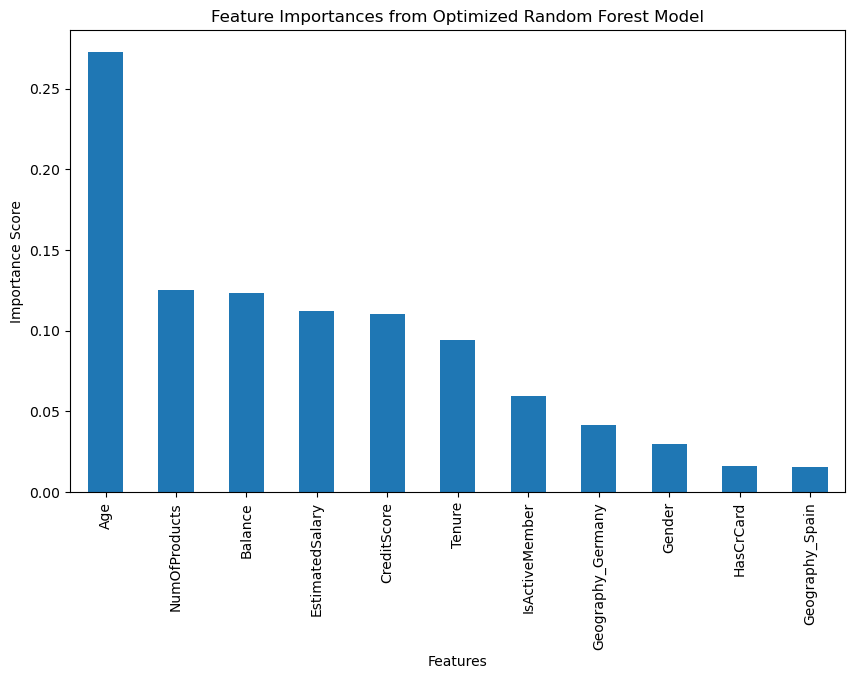

In [8]:
# Visualiseer feature importances
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances from Optimized Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [10]:
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba_optimized >= threshold).astype(int)
    print(f"Threshold = {threshold}")
    print(classification_report(y_test, y_pred_adjusted))


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1607
           1       0.43      0.78      0.55       393

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.78      2000

Threshold = 0.35
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1607
           1       0.47      0.75      0.57       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000

Threshold = 0.4
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.51      0.69      0.59       393

    accuracy                           0.81      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.84  

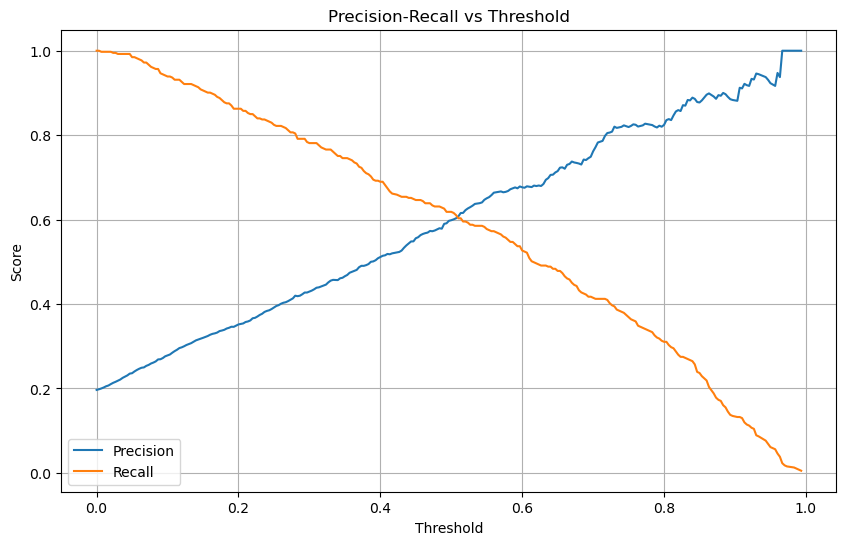

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_optimized)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [25]:
# Probabilistische voorspellingen
y_pred_proba_optimized = best_rf_model.predict_proba(X_test)[:, 1]

# Pas de drempelwaarde van 0.4 toe
threshold = 0.4
y_pred_adjusted = (y_pred_proba_optimized >= threshold).astype(int)

# Evaluatie met de aangepaste drempel
print(f"Evaluatie met Threshold = {threshold}")
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

Evaluatie met Threshold = 0.4
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.51      0.70      0.59       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000


Confusion Matrix:
[[1347  260]
 [ 119  274]]


In [26]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation on the optimized Random Forest model
cv_scores = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", cv_scores)
print("Mean AUC score:", cv_scores.mean())


Cross-validated AUC scores: [0.92641763 0.96212714 0.97488054 0.97102432 0.97884571]
Mean AUC score: 0.9626590707542022


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Stel parameterdistributies in
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# RandomizedSearch instellen
random_search = RandomizedSearchCV(
    estimator=best_rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Test slechts 50 combinaties
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train_resampled, y_train_resampled)

# Beste model
best_rf_model = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 382}


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Maak een nieuwe Random Forest met de beste parameters
optimized_rf = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=382,
    random_state=42
)

# Train het model op de trainingsdata
optimized_rf.fit(X_train_resampled, y_train_resampled)

# Voorspellingen op de testset
y_pred_proba = optimized_rf.predict_proba(X_test)[:, 1]  # Kansvoorspellingen
y_pred = (y_pred_proba >= 0.4).astype(int)  # Drempelwaarde van 0.4

# Evaluatie
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.51      0.70      0.59       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000


Confusion Matrix:
[[1347  260]
 [ 119  274]]

ROC-AUC Score: 0.8537
